In [21]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import learning_curve, validation_curve
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns


In [48]:
### load dataset
data = pd.read_csv("./mushroom_cleaned_data.csv")

In [3]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     5099 non-null   int64  
 1   cap-shape        5099 non-null   int64  
 2   gill-attachment  5099 non-null   int64  
 3   gill-color       5099 non-null   int64  
 4   stem-height      5099 non-null   float64
 5   stem-width       5099 non-null   int64  
 6   stem-color       5099 non-null   int64  
 7   season           5099 non-null   float64
 8   class            5099 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 358.7 KB


In [5]:
data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000,5099.000000
mean,767.506374,3.948617,1.764660,8.879584,1.151752,1320.010786,9.895077,1.038805,0.376937
std,393.908655,2.216886,1.547191,2.415462,0.885403,628.042717,2.520332,0.303646,0.484666
min,69.000000,0.000000,0.000000,0.000000,0.000426,148.000000,0.000000,0.888450,0.000000
25%,517.500000,2.000000,0.000000,9.000000,0.362514,1065.500000,10.000000,0.888450,0.000000
50%,727.000000,5.000000,2.000000,10.000000,0.894847,1343.000000,11.000000,0.943195,0.000000
75%,1037.000000,6.000000,2.000000,10.000000,1.911479,1744.000000,11.000000,0.943195,1.000000
max,1866.000000,6.000000,5.000000,11.000000,3.835320,2942.000000,12.000000,1.804273,1.000000


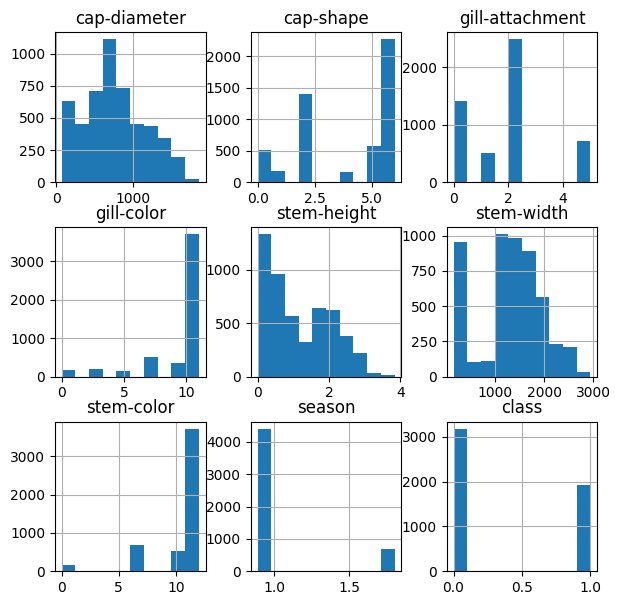

In [111]:
data.hist(figsize=(7,7))
plt.savefig('./plots/hist.png')

In [49]:
y = data['class']
X = data.drop('class',axis=1)

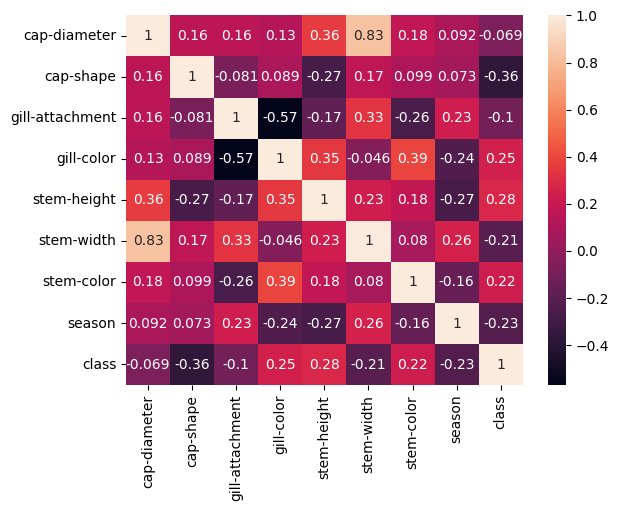

In [112]:
sns.heatmap(data.corr(),annot= True)
plt.savefig('./plots/corr.png')

In [50]:
# Scale the data
X_scaled = X
X_to_scale = X[['cap-diameter','stem-height','stem-width','season']].to_numpy()
scaling = StandardScaler(with_mean=True, with_std=True).fit_transform(X_to_scale)
# X_scaled = scaling.transform(X_to_scale)
X_scaled[['cap-diameter','stem-height','stem-width','season']] = scaling

In [39]:
# Scale the data
X_scaled = X
X_to_scale = X[['cap-diameter','stem-height','stem-width','season']].to_numpy()
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_to_scale)
# X_scaled = scaling.transform(X_to_scale)
X_scaled[['cap-diameter','stem-height','stem-width','season']] = scaling.transform(X_to_scale)

In [62]:
# split training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [106]:
neural_network = MLPClassifier(hidden_layer_sizes=(40,40), activation='logistic') 
neural_network.fit(X_train,y_train)
y_pred = neural_network.predict(X_test)
print(classification_report(y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       607
           1       0.96      0.96      0.96       413

    accuracy                           0.97      1020
   macro avg       0.97      0.97      0.97      1020
weighted avg       0.97      0.97      0.97      1020



C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [64]:
knn = KNeighborsClassifier(n_neighbors=5) # 15, 0.98 5,0.98 
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred=y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       607
           1       0.97      0.98      0.97       413

    accuracy                           0.98      1020
   macro avg       0.98      0.98      0.98      1020
weighted avg       0.98      0.98      0.98      1020



In [99]:
svm = SVC(kernel='poly', degree=10) #LINEAR 0.74;poly 0.93; sigmoid 0.53; rbf 0.94
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred=y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       607
           1       0.96      0.97      0.97       413

    accuracy                           0.97      1020
   macro avg       0.97      0.97      0.97      1020
weighted avg       0.97      0.97      0.97      1020



In [141]:
gbdt = GradientBoostingClassifier(n_estimators=50,max_depth=5)
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)
print(classification_report(y_test, y_pred=y_pred_gbdt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       607
           1       0.97      0.97      0.97       413

    accuracy                           0.98      1020
   macro avg       0.98      0.98      0.98      1020
weighted avg       0.98      0.98      0.98      1020



In [68]:
# Fit neural_network model
neural_network = MLPClassifier(hidden_layer_sizes=(40,40), activation='logistic')
train_sizes_nn, train_scores_nn, test_scores_nn, fit_times_nn, _ = learning_curve(neural_network, X_train, y_train, cv=5,return_times=True, scoring='f1')

C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Li

In [71]:
# Fit knn model
knn = KNeighborsClassifier(n_neighbors=5)
train_sizes_knn, train_scores_knn, test_scores_knn, fit_times_knn, _ = learning_curve(knn, X_train, y_train, cv=5,return_times=True, scoring='f1')

In [100]:
# Fit svm model
svm = SVC(kernel='poly',degree=10)
train_sizes_svm, train_scores_svm, test_scores_svm, fit_times_svm, _ = learning_curve(svm, X_train, y_train, cv=5,return_times=True, scoring='f1')

In [142]:
# Fit gradient boosting DT model
gbdt = GradientBoostingClassifier(n_estimators=50,max_depth=7)
train_sizes_gbdt, train_scores_gbdt, test_scores_gbdt, fit_times_gbdt, _ = learning_curve(gbdt, X_train, y_train, cv=5,return_times=True, scoring='f1')

In [195]:
# Funtion to plot curves
def curve_plot(x, train_scores, test_scores, title, x_label,filepath=None):
    # plt.figure()
    plt.plot(x,np.mean(train_scores,axis=1), label='training')
    plt.plot(x,np.mean(test_scores,axis=1), label='validation')
    
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel("F1 Score")
    plt.legend()
    if filepath:
        plt.savefig(filepath)
    # plt.show()

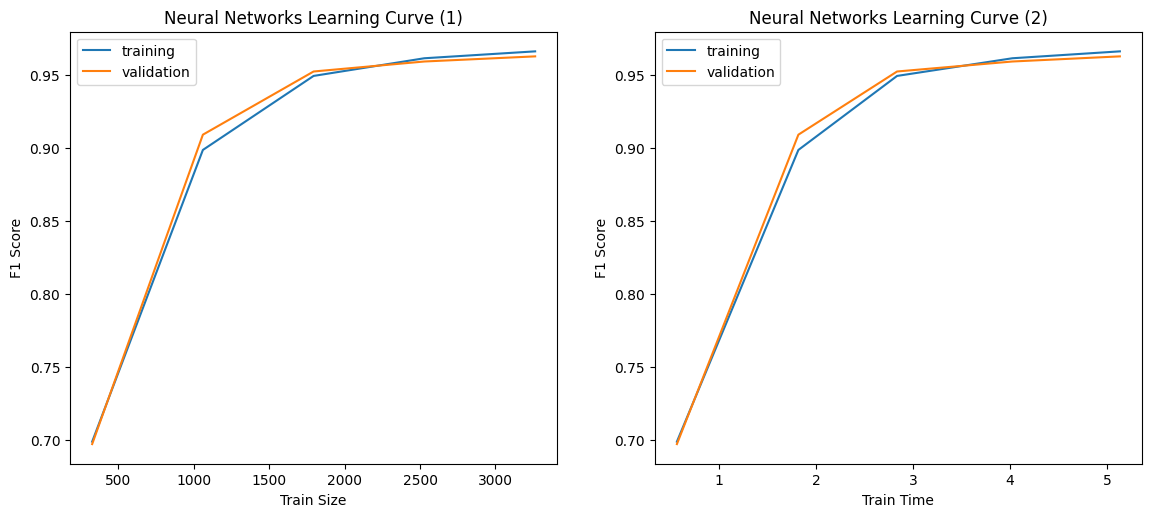

In [192]:
# Neural Network Learning Curves
plt.figure()
# f, axs = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
curve_plot(train_sizes_nn, train_scores_nn, test_scores_nn, "Neural Networks Learning Curve (1)", 'Train Size')
plt.subplot(1, 2, 2)
curve_plot(np.mean(fit_times_nn,axis=1), train_scores_nn, test_scores_nn, "Neural Networks Learning Curve (2)", 'Train Time')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1)
plt.savefig('./plots/learning_curves_nn.png',bbox_inches='tight')

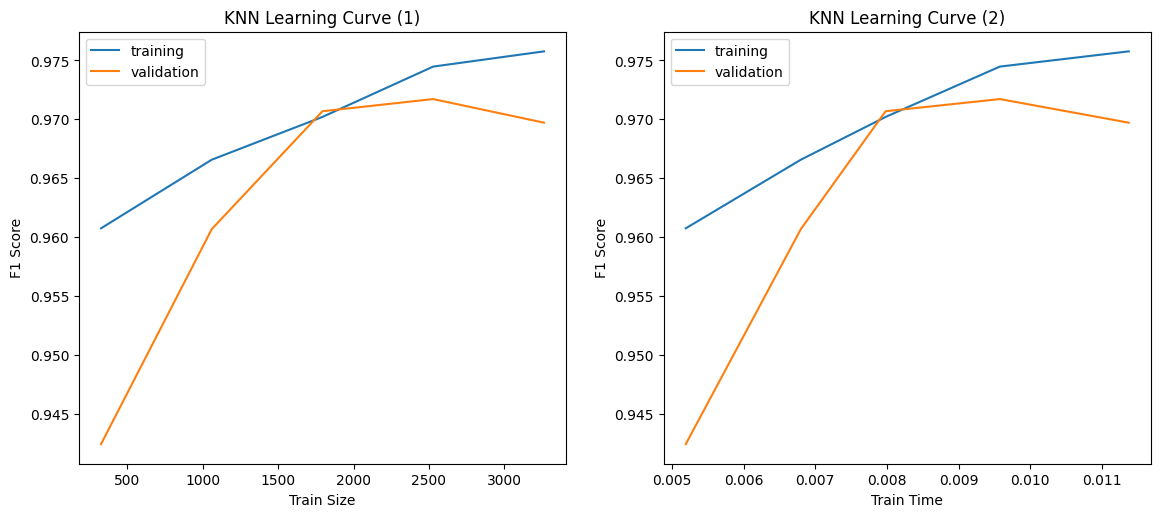

In [193]:
# KNN Learning Curves
plt.figure()
# f, axs = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
curve_plot(train_sizes_knn, train_scores_knn, test_scores_knn, "KNN Learning Curve (1)", 'Train Size')
plt.subplot(1, 2, 2)
curve_plot(np.mean(fit_times_knn,axis=1), train_scores_knn, test_scores_knn, "KNN Learning Curve (2)", 'Train Time')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1)
plt.savefig('./plots/learning_curves_knn.png',bbox_inches='tight')

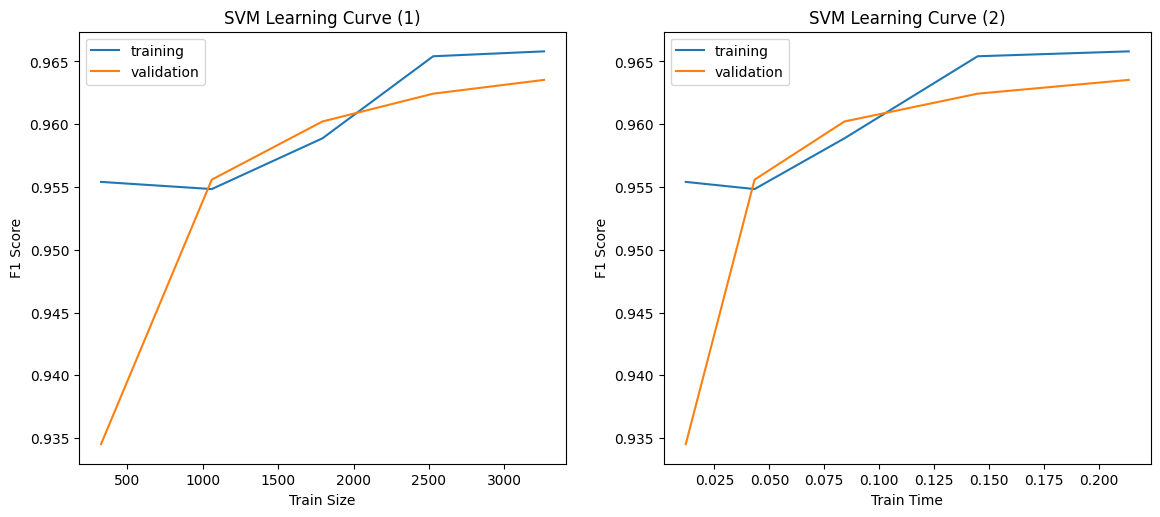

In [194]:
# SVM Learning Curves
plt.figure()
# f, axs = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
curve_plot(train_sizes_svm, train_scores_svm, test_scores_svm, "SVM Learning Curve (1)", 'Train Size')
plt.subplot(1, 2, 2)
curve_plot(np.mean(fit_times_svm,axis=1), train_scores_svm, test_scores_svm, "SVM Learning Curve (2)", 'Train Time')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1)
plt.savefig('./plots/learning_curves_svm.png',bbox_inches='tight')


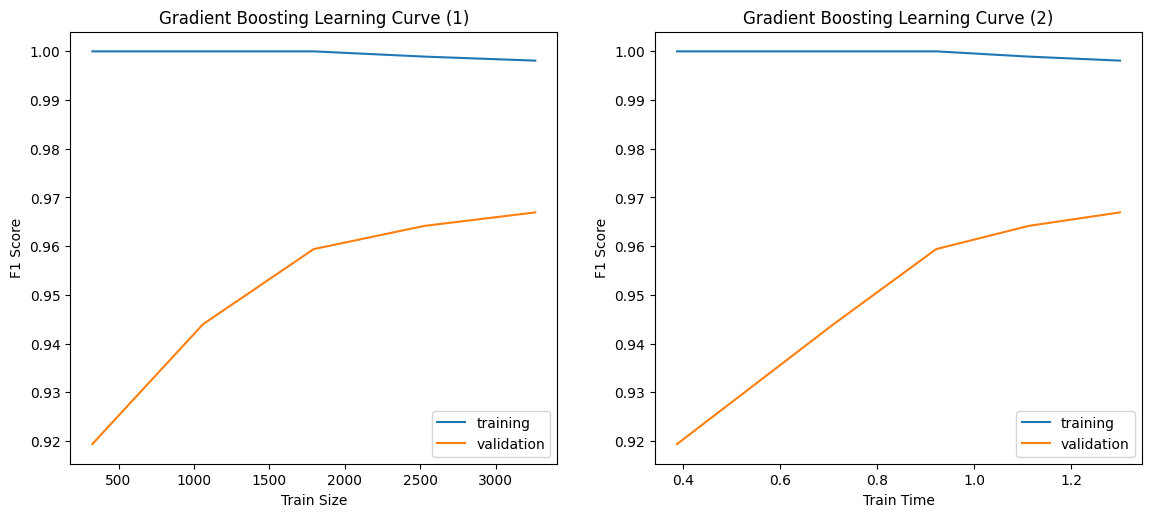

In [196]:
# Gradient Boosting Learning Curves
plt.figure()
# f, axs = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
curve_plot(train_sizes_gbdt, train_scores_gbdt, test_scores_gbdt, "Gradient Boosting Learning Curve (1)", 'Train Size')
plt.subplot(1, 2, 2)
curve_plot(np.mean(fit_times_gbdt,axis=1), train_scores_gbdt, test_scores_gbdt, "Gradient Boosting Learning Curve (2)", 'Train Time')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1)
plt.savefig('./plots/learning_curves_gb.png',bbox_inches='tight')


In [78]:
# Neural Network Hyperparameters
neural_network = MLPClassifier(activation='logistic')
param_name_nn, param_range_nn = "hidden_layer_sizes", [(10,10), (20,20), (40, 40), (60,60), (100, 100)]
train_param_nn_scores, test_param_nn_scores = validation_curve(
    neural_network, X_train, y_train, param_name=param_name_nn, param_range=param_range_nn, cv=5, scoring='f1'
)

C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\zebin\miniconda3\envs\ml\Li

In [79]:
# KNN Hyperparameters
knn = KNeighborsClassifier()
param_name_knn, param_range_knn = "n_neighbors", [1,3,5,7,9,15]
train_param_knn_scores, test_param_knn_scores = validation_curve(
    knn, X_train, y_train, param_name=param_name_knn, param_range=param_range_knn, cv=5, scoring='f1'
)

In [107]:
# SVM Hyperparameters
svm = SVC(degree=10)
param_name_svm, param_range_svm = "kernel", ['linear','poly','rbf','sigmoid']
train_param_svm_scores, test_param_svm_scores = validation_curve(
    svm, X_train, y_train, param_name=param_name_svm, param_range=param_range_svm, cv=5, scoring='f1'
)

In [152]:
# Gradient Boosting Hyperparameters
gbdt = GradientBoostingClassifier(max_depth=5)
param_name_gbdt, param_range_gbdt = "n_estimators", [10,50,100,150,200]
train_param_gbdt_scores, test_param_gbdt_scores = validation_curve(
    gbdt, X_train, y_train, param_name=param_name_gbdt, param_range=param_range_gbdt, cv=5, scoring='f1'
)

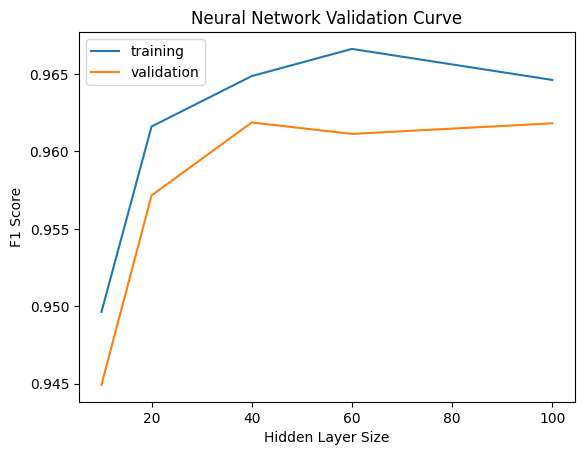

In [120]:
# NN Validation Curve
param_x = [i[0] for i in param_range_nn]
curve_plot(param_x, train_param_nn_scores, test_param_nn_scores, "Neural Network Validation Curve", 'Hidden Layer Size','./plots/validation_curve_nn1.png')

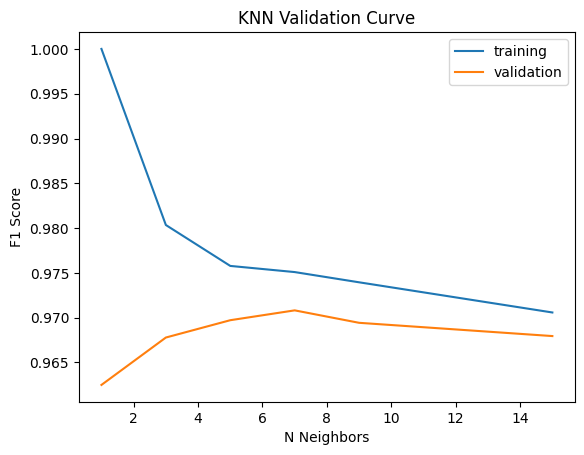

In [121]:
# KNN Validation Curve
curve_plot(param_range_knn, train_param_knn_scores, test_param_knn_scores, "KNN Validation Curve", 'N Neighbors','./plots/validation_curve_knn.png')

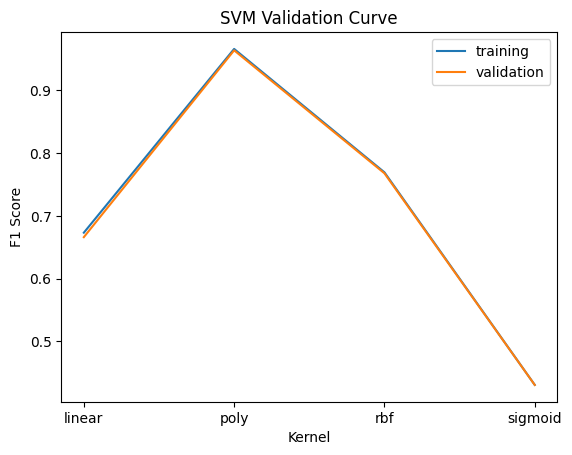

In [122]:
# SVM Validation Curve
curve_plot(param_range_svm, train_param_svm_scores, test_param_svm_scores, "SVM Validation Curve", 'Kernel','./plots/validation_curve_svm.png')

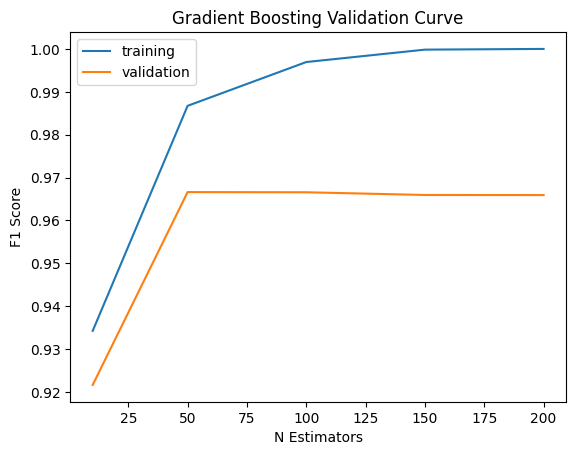

In [153]:
# Gradient Boosting Validation Curve
curve_plot(param_range_gbdt, train_param_gbdt_scores, test_param_gbdt_scores, "Gradient Boosting Validation Curve", 'N Estimators','./plots/validation_curve_gb.png')

In [162]:
# Predict Accuracy
neural_network = MLPClassifier(hidden_layer_sizes=(50, 50), activation='logistic')
neural_network.fit(X_train, y_train)
y_pred_nn = neural_network.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svm = SVC(kernel='poly',degree=10)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

gbdt = GradientBoostingClassifier(n_estimators=50,max_depth=5)
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)

In [163]:
nn_pred_score = f1_score(y_test, y_pred_nn)
knn_pred_score = f1_score(y_test, y_pred_knn)
svm_pred_score = f1_score(y_test, y_pred_svm)
gbdt_pred_score = f1_score(y_test, y_pred_gbdt)

print("Predicting score of neural networks: ", nn_pred_score)
print("Predicting score of KNN: ", knn_pred_score)
print("Predicting score of SVM: ", svm_pred_score)
print("Predicting score of Gradient Boosting: ", gbdt_pred_score)

Predicting score of neural networks:  0.9664268585131894
Predicting score of KNN:  0.9745454545454545
Predicting score of SVM:  0.966183574879227
Predicting score of Gradient Boosting:  0.9709443099273608


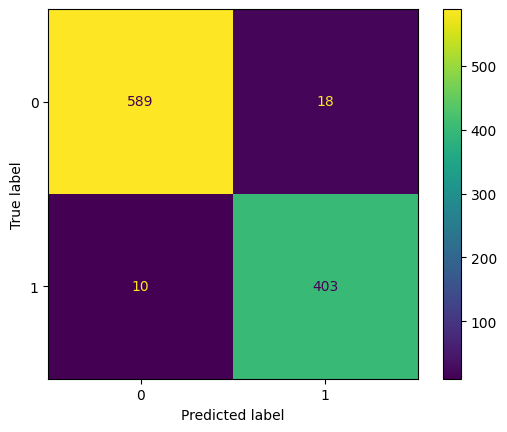

In [164]:
# Neural Network Confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn, labels=neural_network.classes_)
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn,
                              display_labels=neural_network.classes_)
disp_nn.plot()


In [169]:
18/589

0.9830220713073005

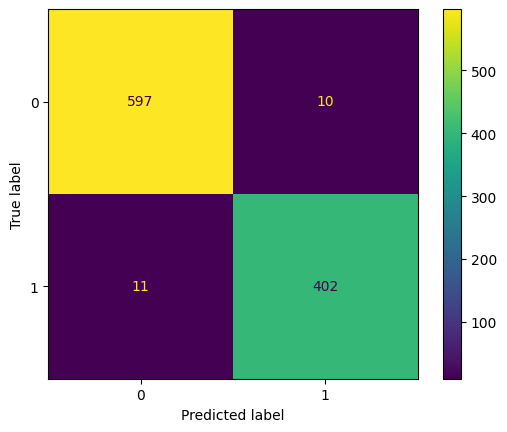

In [165]:
# KNN Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=neural_network.classes_)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=neural_network.classes_)
disp_knn.plot()

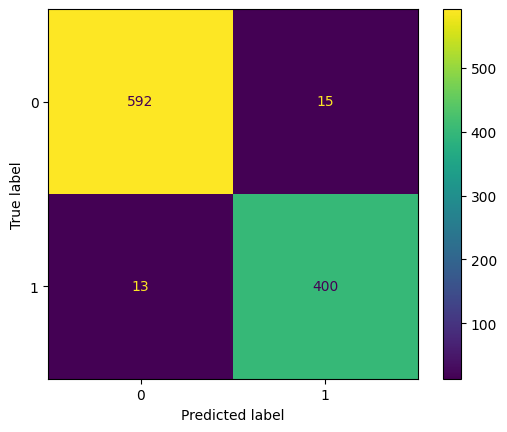

In [166]:
# SVM Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=neural_network.classes_)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                              display_labels=neural_network.classes_)
disp_svm.plot()

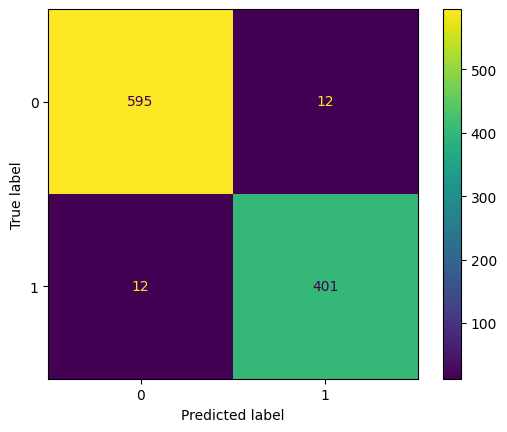

In [167]:
# Gradient Boosting Confusion matrix
cm_gbdt = confusion_matrix(y_test, y_pred_gbdt, labels=neural_network.classes_)
disp_gbdt = ConfusionMatrixDisplay(confusion_matrix=cm_gbdt,
                              display_labels=neural_network.classes_)
disp_gbdt.plot()

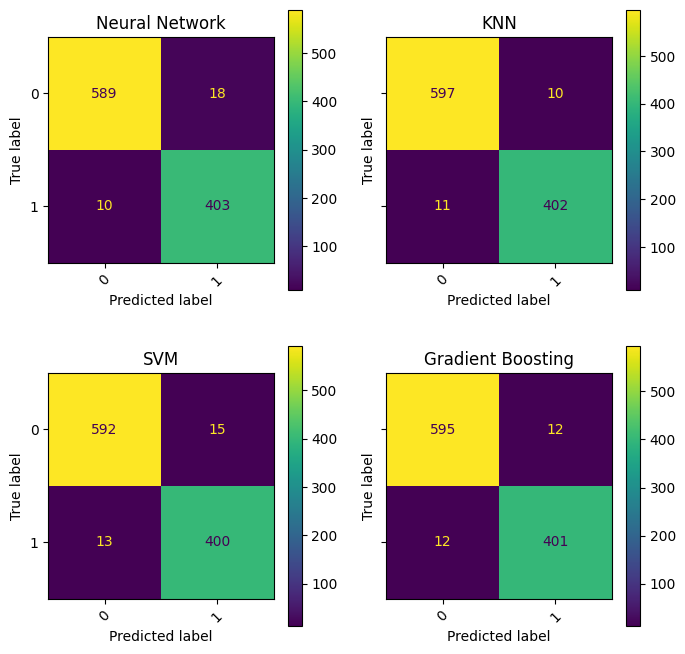

In [210]:
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharey='row')
disp_nn.plot(ax=axes[0][0], xticks_rotation=45)
disp_nn.ax_.set_title('Neural Network')
disp_knn.plot(ax=axes[0][1], xticks_rotation=45)
disp_knn.ax_.set_title('KNN')
disp_svm.plot(ax=axes[1][0], xticks_rotation=45)
disp_svm.ax_.set_title('SVM')
disp_gbdt.plot(ax=axes[1][1], xticks_rotation=45)
disp_gbdt.ax_.set_title('Gradient Boosting')
plt.savefig('./plots/confustion_matrix.png',bbox_inches='tight')